In [1]:
import mkl_random
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt
import sys

#### Excercise 3

##### Excercise 3.3

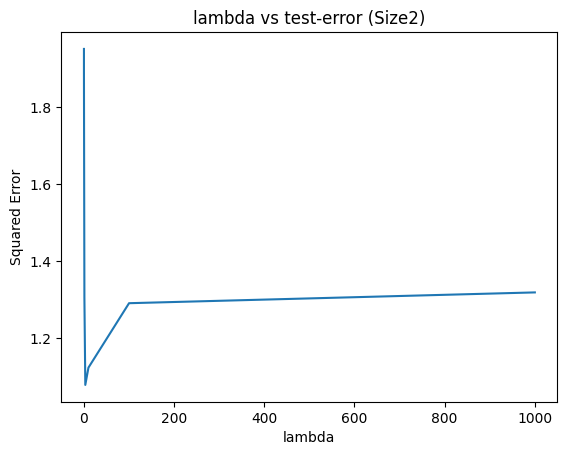

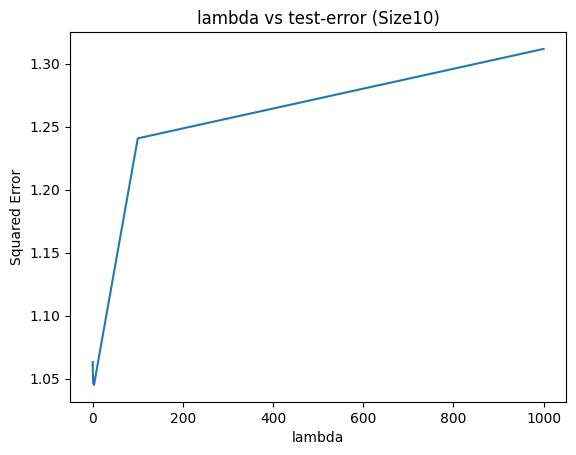

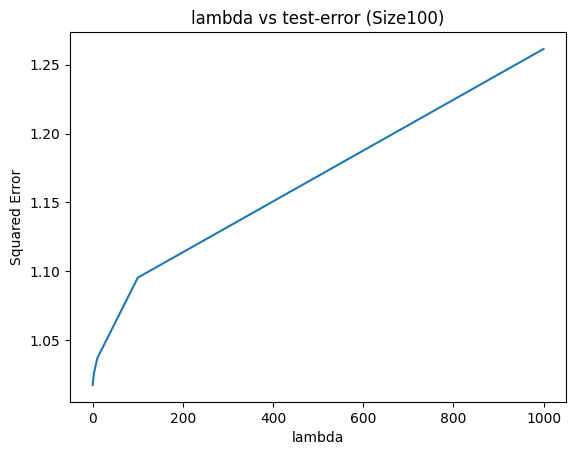

[(3.0, 1.0775513417650309), (3.0, 1.0450809149376774), (0.0, 1.0175206875162426)]


In [2]:
test_size = 10000


np.random.seed(2)

epsilon_test = np.sort(np.random.randn(test_size, 1))
x_test = np.random.uniform(0,1, (1, test_size))
x_test  = np.sort(x_test).reshape(test_size, 1)
y_test = x_test + epsilon_test



np.random.seed(10)


def train_X_lambda(train_size):
    def train(X, lambdas):
        min_error = sys.maxsize
        min_x = -1
        for lambda_ in lambdas:
            w_fit = pr.ridger(X, lambda_)

            eval_r = w_fit.eval(pr.gendatr(x_test, y_test))
            test_errors.append(pr.testr(eval_r))
            if(min_error >= pr.testr(eval_r)):
                min_error = pr.testr(eval_r)
                min_x = lambda_
    

        return (min_x, min_error)
    
    Xs = []
    lambdas = [0.0, 0.001, 0.01, 1.0, 3.0, 10.0, 100.0, 1000.0]
    for size in train_size:  
        epsilon_train = np.sort(np.random.randn(size, 1))
        x_train = np.random.uniform(0,1, (1, size))
        x_train  = np.sort(x_train).reshape(size, 1)
        y_train = x_train + epsilon_train
        regression_dataset = pr.gendatr(x_train, y_train)    
        test_errors = []
        Xs.append(train(regression_dataset, lambdas))
        plt.plot(lambdas, test_errors)
        plt.title("lambda vs test-error (Size"+str(size)+")")
        plt.xlabel('lambda')
        plt.ylabel('Squared Error')
        plt.show()

    print(Xs)
    
train_X_lambda([2, 10, 100])



##### Excercise 3.13a

In [3]:
N = 30
e = np.zeros(N)
t = pr.gendath([500, 500])
for i in range(N):
    a = pr.gendath([20,20])
    e[i] = t*pr.ldc(a)*pr.testc()
print(e)
print(np.std(e))

[0.163 0.215 0.188 0.178 0.193 0.221 0.211 0.221 0.159 0.191 0.154 0.166
 0.2   0.209 0.229 0.196 0.144 0.204 0.187 0.184 0.226 0.194 0.159 0.21
 0.172 0.204 0.19  0.177 0.202 0.217]
0.02249553042026102


##### Excercise 3.13b

In [4]:
N = 30
e = np.zeros(N)
a = pr.gendath([20,20])
for i in range(N):
    t = pr.gendath([500, 500])
    e[i] = t*pr.ldc(a)*pr.testc()
print(e)
print(np.std(e))

[0.207 0.209 0.201 0.191 0.198 0.203 0.199 0.18  0.186 0.178 0.168 0.177
 0.181 0.179 0.208 0.196 0.203 0.183 0.183 0.17  0.175 0.194 0.178 0.196
 0.221 0.201 0.212 0.184 0.199 0.183]
0.013315863555257025


##### Excercise 3.14(a, b, c)

In [5]:
help(pr.cleval)

Help on function cleval in module prtools.prtools:

cleval(a, u, trainsize=[2, 3, 5, 10, 20, 30], nrreps=3, testfunc=<function testc at 0x000002ACDAC90E50>)
    Learning curve
    
           E = cleval(A,U,TRAINSIZE,NRREPS)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A for varying training set sizes. Default is
    trainsize=[2,3,5,10,20,30].
    To get reliable estimates, the train-test split is repeated NRREPS=3
    times.
    
    Example:
    a = gendatb([100,100])
    u = nmc()
    e = cleval(a,u,nrreps=10)



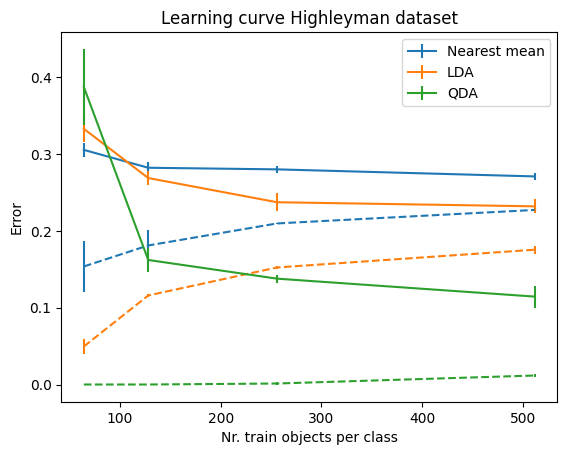

In [4]:
def concatenate_custom(dataset, noise):
    import copy
    out = copy.deepcopy(dataset)
    return out.setdata(np.concatenate((out.data, noise.data), axis =1))

dataset_a = pr.gendath([1000, 1000])
noise = np.random.randn(2000,60)
dataset_a = concatenate_custom(dataset_a, noise)

for i in [pr.nmc(), pr.ldc(), pr.qdc()]:
    pr.cleval(dataset_a, i, trainsize=[64, 128, 256, 512])
    plt.legend()

##### Excercise 3.15(a)

(array([[0.0849359 , 0.0982906 , 0.09775641],
        [0.09231651, 0.08600917, 0.09518349],
        [0.08534946, 0.09408602, 0.08938172],
        [0.0727459 , 0.08709016, 0.09733607]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

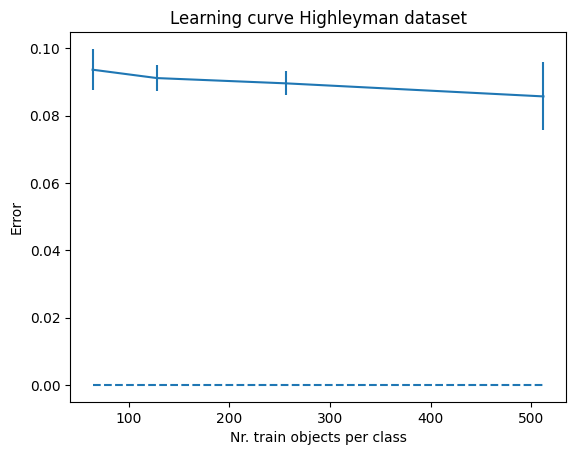

In [5]:
dataset = pr.gendath([1000, 1000])
w = pr.knnc()
pr.cleval(dataset, w, trainsize=[64,  128, 256, 512])

##### Excercise 3.16

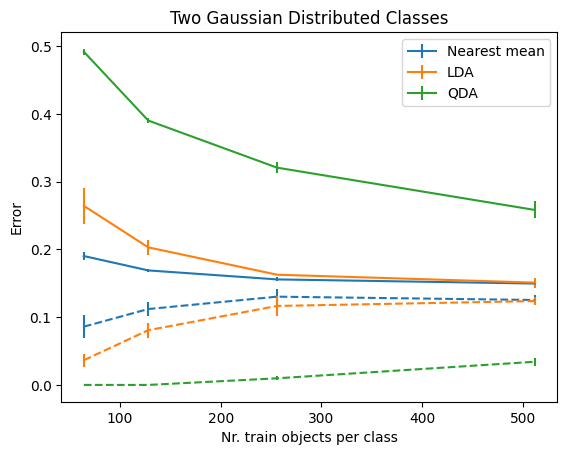

In [9]:
dataset_b = pr.gendats([1000, 1000])
noise = np.random.randn(2000,60)
dataset_b = concatenate_custom(dataset_b, noise)

for i in [pr.nmc(), pr.ldc(), pr.qdc()]:
    pr.cleval(b, i, trainsize=[64, 128, 256, 512])
    plt.legend()
    plt.title("Two Gaussian Distributed Classes")  
plt.show()

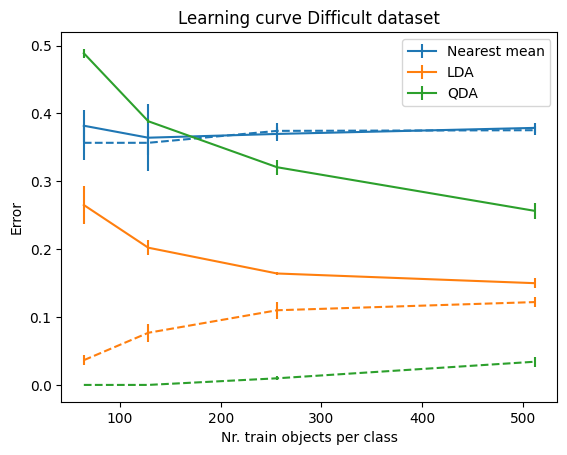

In [10]:
dataset_e = pr.gendatd([1000, 1000])
noise = np.random.randn(2000,60)
dataset_e = concatenate_custom(dataset_e, noise)

for i in [pr.nmc(), pr.ldc(), pr.qdc()]:
    pr.cleval(e, i, trainsize=[64, 128, 256, 512])
    plt.legend()

##### Excercise 3.17

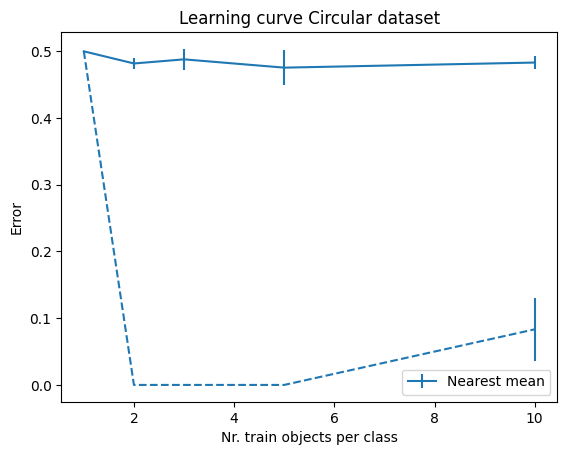

In [18]:
dataset_f = pr.gendatc([1000, 1000])
noise = np.random.randn(2000,60)
dataset_f = concatenate_custom(dataset_f, noise)

for i in [pr.nmc()]:
    pr.cleval(dataset_f, i, trainsize=[1, 2, 3, 5, 10])
    plt.legend()

##### Excercise 3.19(a&b)

(array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.725     , 0.72583333, 0.70916667, 0.725     , 0.71416667],
        [0.63333333, 0.6225    , 0.625     , 0.63083333, 0.62583333],
        [0.5725    , 0.5725    , 0.56      , 0.5625    , 0.5625    ]]),
 array([[0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.71375, 0.7175 , 0.7225 , 0.7175 , 0.7425 ],
        [0.60625, 0.6025 , 0.60125, 0.6175 , 0.59875],
        [0.55625, 0.54125, 0.55375, 0.5575 , 0.5475 ]]))

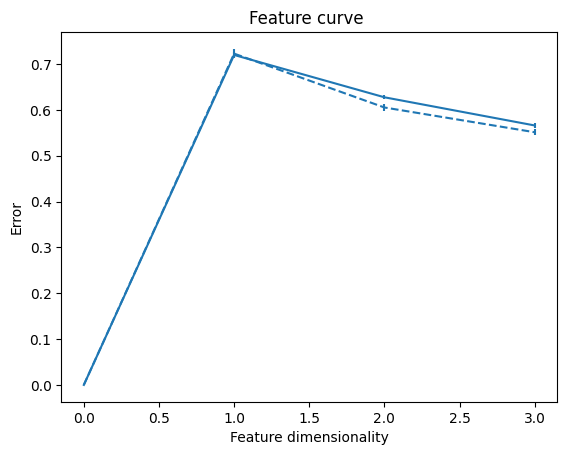

In [107]:
CSVData = open("mfeat-karhunen_csv.csv")
mfeatkar_dataset = np.genfromtxt(CSVData, delimiter=",")
mfeatkar_dataset_data = mfeatkar_dataset[1:, :64]
mfeatkar_dataset_targets = mfeatkar_dataset[1:, 64]

mfeatkar_prdataset = pr.prdataset(mfeatkar_dataset_data, mfeatkar_dataset_targets)

mfeatkar_prdataset_features = pr.prdataset(mfeatkar_dataset_data[:, [3, 7, 15, 31]], mfeatkar_dataset_targets)
pr.clevalf(mfeatkar_prdataset_features, pr.qdc(), 0.40)

##### Excercise 3.20

In [134]:
small_dataset = pr.gendatb((10, 10))
a =pr.prcrossval(small_dataset, pr.knnc(), k=5)



[[0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [4.]
 [0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [1.]
 [2.]
 [0.]
 [3.]
 [4.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [3.]
 [4.]
 [0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [0.]
 [2.]
 [1.]
 [3.]
 [2.]
 [4.]
 [0.]
 [3.]
 [1.]
 [4.]
 [0.]
 [2.]
 [1.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [1.]
 [4.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [3.]
 [2.]
 [4.]
 [0.]
 [3.]
 [4.]
 [0.]
 [1.]
 [2.]
 [1.]
 [3.]
 [2.]
 [3.]
 [4.]
 [0.]
 [4.]
 [0.]
 [1.]
 [2.]
 [3.]
 [1.]
 [4.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [1.]
 [2.]
 [1.]
 [3.]
 [4.]
 [2.]
 [3.]
 [4.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [3.]
 [4.]
 [3.]
 [0.]
 [4.]
 [1.]
 [2.]
 [0.]
 [3.]
 [1.]
 [2.]
 [3.]
 [4.]
 [0.]
 [4.]
 [1.]
 [2.]
 [0.]
 [3.]
 [1.]
 [2.]
 [3.]
 [4.]
 [4.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [3.]
 [4.]
 [2.]
 [3.]
 [4.]
 [0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [0.]
 [0.